### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/kwiga files/marketing_campaign.csv', sep='\t', index_col=0)

In [4]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [6]:
data.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [7]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [8]:
missing_values= (24/2240)*100
missing_values

1.0714285714285714

Так як відсоток пропущених значень в одному стовпчику всього 1% - можна видалити рядки з цими пропущеними значеннями.

In [9]:
data = data.dropna()

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [10]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [13]:
data['Dt_Customer'] = data['Dt_Customer'].dt.year

In [14]:
data["Age"] = 2024 - data["Year_Birth"]

In [15]:
def education_level(education):
    if education in ["Graduation","phD","Master"]:
        return "high"
    elif education in ["Basic"]:
        return "Middle"
    else:
        return "Low"

data["Education_level"] = data["Education"].apply(education_level)

In [16]:
def marital_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

data['Living_Status'] = data['Marital_Status'].apply(marital_status)

In [17]:
to_drop = ['Year_Birth', 'Education', 'Marital_Status']
df = data.drop(to_drop, axis=1)

In [18]:
categorical_cols = df.select_dtypes('object').columns.tolist()
numeric_cols=df.select_dtypes(include=np.number).columns.tolist()


In [19]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [20]:
encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [21]:
df.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_Revenue,Response,Age,Education_level,Living_Status,Education_level_Low,Education_level_Middle,Education_level_high,Living_Status_Living Alone,Living_Status_Living with Others
ID,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,2012,58,635,88,546,172,88,...,11,1,67,high,Living with Others,0.0,0.0,1.0,0.0,1.0
2174,46344.0,1,1,2014,38,11,1,6,2,1,...,11,0,70,high,Living with Others,0.0,0.0,1.0,0.0,1.0
4141,71613.0,0,0,2013,26,426,49,127,111,21,...,11,0,59,high,Living with Others,0.0,0.0,1.0,0.0,1.0
6182,26646.0,1,0,2014,26,11,4,20,10,3,...,11,0,40,high,Living with Others,0.0,0.0,1.0,0.0,1.0
5324,58293.0,1,0,2014,94,173,43,118,46,27,...,11,0,43,Low,Living with Others,1.0,0.0,0.0,0.0,1.0


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [22]:
X = df.drop(['Education_level', 'Living_Status'], axis=1)
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)


labels = kmeans.predict(X)
print(labels)

[0 0 2 ... 0 2 0]


In [23]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.54


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [24]:
import plotly.express as px

df['Cluster'] = labels

fig = px.scatter_3d(df, x='Income', y='NumWebPurchases', z='NumDealsPurchases',
                    color='Cluster',
                    labels={'Cluster': 'Cluster Label'},
                    title='3D Scatter Plot of Clusters by Income, Web Purchases, and Deals Purchases')

fig.show()

**Розподіл даних по кластерах**: На тривимірному графіку видно, що кластери відрізняються за кількома змінними, зокрема Income (дохід), NumWebPurchases (кількість покупок через веб), і NumDealsPurchases (кількість покупок зі знижками).
• Один з кластерів (жовтий) зосереджений у низькому діапазоні по двох змінних (мало веб покупок та покупки зі знижками) і високий дохід
• Другий кластер (синій) має вищі значення за Income ніж синій кластер та загалом схожу картину щодо веб-покупок та покупок зі знижками як у синього кластеру
• Третій кластер(червоний) має найнижчий дохід, і трохи менші показники веб покупок та покупок з акціями ниж у синього кластеру.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [25]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [26]:
df[numeric_cols]= scaler.transform(df[numeric_cols])

In [27]:
X_new=df.drop(['Education_level', 'Living_Status','Cluster'], axis=1)

In [28]:
X_new

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level_Low,Education_level_Middle,Education_level_high,Living_Status_Living Alone,Living_Status_Living with Others
ID,,,,,,,,,,,,,,,,,,,,,
5524,0.084832,0.0,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,...,0.0,0.0,0.0,1.0,0.378641,0.0,0.0,1.0,0.0,1.0
2174,0.067095,0.5,0.5,1.0,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,...,0.0,0.0,0.0,0.0,0.407767,0.0,0.0,1.0,0.0,1.0
4141,0.105097,0.0,0.0,0.5,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,...,0.0,0.0,0.0,0.0,0.300971,0.0,0.0,1.0,0.0,1.0
6182,0.037471,0.5,0.0,1.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,...,0.0,0.0,0.0,0.0,0.116505,0.0,0.0,1.0,0.0,1.0
5324,0.085065,0.5,0.0,1.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,...,0.0,0.0,0.0,0.0,0.145631,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0.089472,0.0,0.5,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,...,0.0,0.0,0.0,0.0,0.281553,0.0,0.0,1.0,0.0,1.0
4001,0.093669,1.0,0.5,1.0,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.485437,1.0,0.0,0.0,0.0,1.0
7270,0.083092,0.0,0.0,1.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,...,0.0,0.0,0.0,0.0,0.145631,0.0,0.0,1.0,0.0,1.0


In [29]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_new)


labels = kmeans.predict(X_new)
print(labels)

[2 1 2 ... 2 2 0]


In [30]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_new, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.21


Silhouette Coefficient значно став нижчим в порівнянні не з масштабованими даними.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [31]:
# Спостерігаємо викиди за стовпчиком Income
Q1 = X['Income'].quantile(0.25)
Q3 = X['Income'].quantile(0.75)
IQR = Q3 - Q1

# Визначення викидів
outliers = ((X['Income'] < (Q1 - 1.5 * IQR)) | (X['Income'] > (Q3 + 1.5 * IQR)))

print("Number of Outliers:", outliers.sum())

# Фільтрація даних без викидів(так як їх небагато то можна видалити ці дані)
X_without_outliers = X[~outliers]


Number of Outliers: 8


In [35]:
X_2 = X_without_outliers

In [36]:
X_2

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_level_Low,Education_level_Middle,Education_level_high,Living_Status_Living Alone,Living_Status_Living with Others
ID,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,2012,58,635,88,546,172,88,...,0,3,11,1,67,0.0,0.0,1.0,0.0,1.0
2174,46344.0,1,1,2014,38,11,1,6,2,1,...,0,3,11,0,70,0.0,0.0,1.0,0.0,1.0
4141,71613.0,0,0,2013,26,426,49,127,111,21,...,0,3,11,0,59,0.0,0.0,1.0,0.0,1.0
6182,26646.0,1,0,2014,26,11,4,20,10,3,...,0,3,11,0,40,0.0,0.0,1.0,0.0,1.0
5324,58293.0,1,0,2014,94,173,43,118,46,27,...,0,3,11,0,43,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,0,1,2013,46,709,43,182,42,118,...,0,3,11,0,57,0.0,0.0,1.0,0.0,1.0
4001,64014.0,2,1,2014,56,406,0,30,0,0,...,0,3,11,0,78,1.0,0.0,0.0,0.0,1.0
7270,56981.0,0,0,2014,91,908,48,217,32,12,...,0,3,11,0,43,0.0,0.0,1.0,0.0,1.0


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

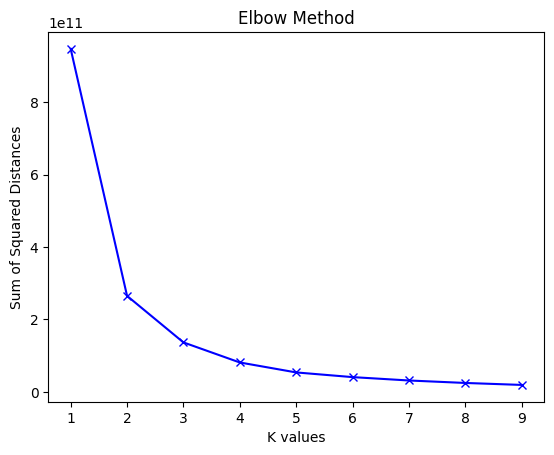

In [37]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_2)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

**Найоптимальніша** кількість кластерів=4. Я обрала модель без масштабованих даних, оскільки з ними я отримала набагато гірші показники сілует метрики.

In [38]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X_2)


labels = kmeans.predict(X_2)
print(labels)

[3 0 1 ... 3 3 3]


In [39]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_2, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.54


In [40]:
X_2['Cluster'] = labels

fig = px.scatter_3d(X_2, x='Income', y='NumWebPurchases', z='NumDealsPurchases',
                    color='Cluster',
                    labels={'Cluster': 'Cluster Label'},
                    title='3D Scatter Plot of Clusters by Income, Web Purchases, and Deals Purchases')
fig.show()

<ipython-input-40-6c188398b425>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [43]:
X_2 = X_2.drop(['Cluster'], axis=1)

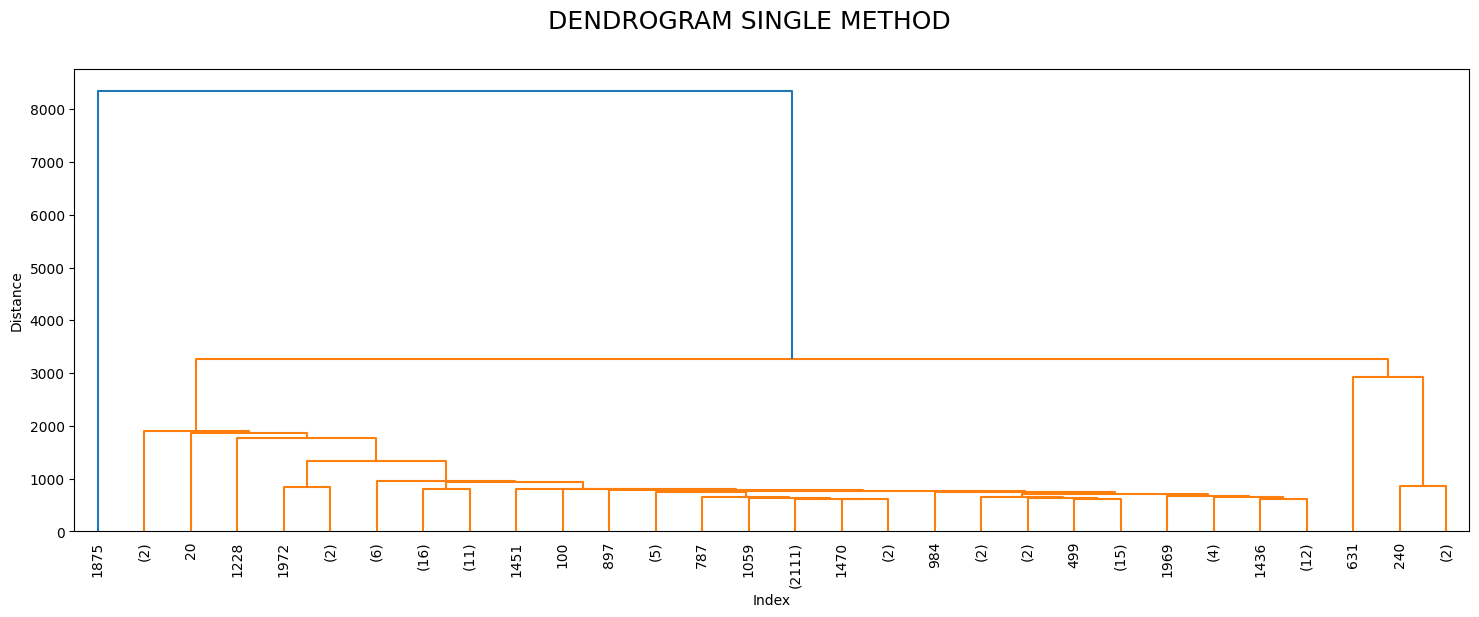

In [44]:
dist_sin = linkage(X_2, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [45]:
X_2['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_2['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

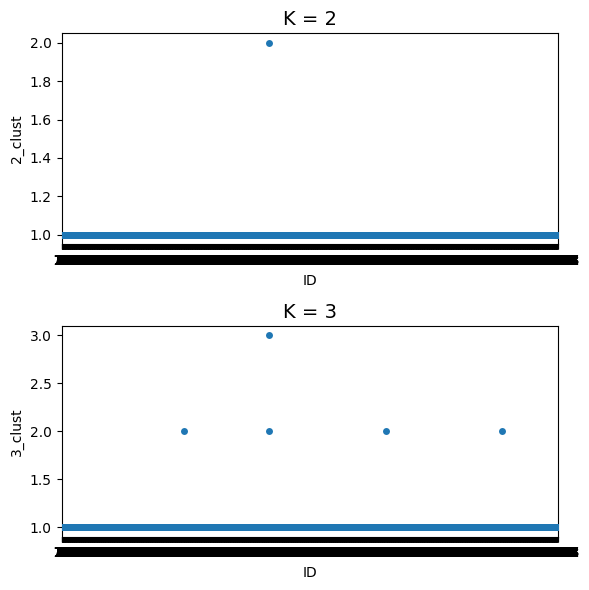

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Візуалізація для кластера "2_clust"
plt.subplot(2, 1, 1)
plt.title("K = 2", fontsize=14)
sns.stripplot(x=X_2.index, y="2_clust", data=X_2)

# Візуалізація для кластера "3_clust"
plt.subplot(2, 1, 2)
plt.title("K = 3", fontsize=14)
sns.stripplot(x=X_2.index, y="3_clust", data=X_2)

plt.tight_layout()
plt.show()



Якось важко інтерпретувати ці візуалізації, можливо я припустилась десь помилки...

In [47]:
# Для 2 кластерів
silhouette_avg_2 = silhouette_score(X_2, X_2['2_clust'])
print(f"Середній силует для 2 кластерів: {silhouette_avg_2}")

# Для 3 кластерів
silhouette_avg_3 = silhouette_score(X_2, X_2['3_clust'])
print(f"Середній силует для 3 кластерів: {silhouette_avg_3}")

Середній силует для 2 кластерів: 0.5545552150143058
Середній силует для 3 кластерів: 0.44695644762026016


**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

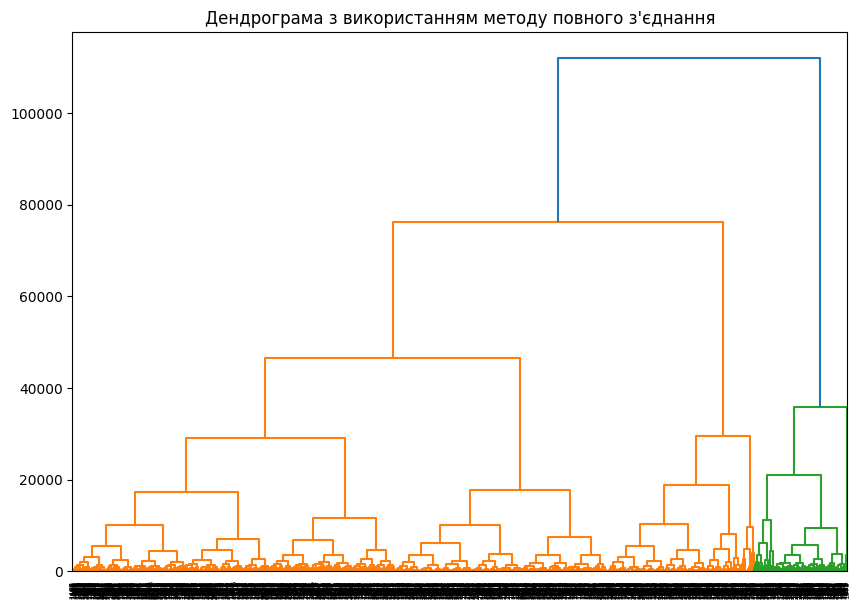

In [60]:
linked = linkage(X_2, method='complete')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Дендрограма з використанням методу повного з'єднання")
plt.show()

In [67]:
labels = fcluster(linked, 4, criterion='maxclust')

# Обчислення метрики силуету
silhouette_avg = silhouette_score(X_2, labels)
print("Середнє значення силуету при повному з'єднанні:", silhouette_avg)

Середнє значення силуету при повному з'єднанні: 0.4795459493891343
